In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [171]:
#we read the iris dataset by using the pandas library read_csv.If excel  file will be there then we will use read_excel.
df = pd.read_csv('IRIS (2).csv')

In [172]:
#we will display first five row of data to find out what this particular table or columns of data show.
df.head()


  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [173]:
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'id'})

In [174]:
df

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


In [175]:
#change the columns name
df1=df.rename(columns={0: 'SepalLengthCm',1: 'SepalWidthCm', 2: 'PetalLengthCm',3:'PetalWidthCm',4:'Species'})
df1

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


In [176]:
#we want to find last five rows:-
df.tail()

,id,sepal_length,sepal_width,petal_length,petal_width,species
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica
149,149,5.9,3.0,5.1,1.8,Iris-virginica


In [177]:
#we display all the information about the data like datatytpe etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [178]:
#we display some basic statistical details like percentile, mean, std etc 
df.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [179]:
#no. of rows and columns in dataset
df.shape

(150, 6)

In [180]:
# we count the np. of observations
df.count()


id              150
sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [181]:
#datatype and names of columns
df.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [182]:
#the counts of unique values
df.value_counts()

id   sepal_length  sepal_width  petal_length  petal_width  species        
0    5.1           3.5          1.4           0.2          Iris-setosa        1
94   5.6           2.7          4.2           1.3          Iris-versicolor    1
96   5.7           2.9          4.2           1.3          Iris-versicolor    1
97   6.2           2.9          4.3           1.3          Iris-versicolor    1
98   5.1           2.5          3.0           1.1          Iris-versicolor    1
                                                                             ..
50   7.0           3.2          4.7           1.4          Iris-versicolor    1
51   6.4           3.2          4.5           1.5          Iris-versicolor    1
52   6.9           3.1          4.9           1.5          Iris-versicolor    1
53   5.5           2.3          4.0           1.3          Iris-versicolor    1
149  5.9           3.0          5.1           1.8          Iris-virginica     1
Length: 150, dtype: int64

In [183]:
#it returns true if particular row value is missing or null.
df.isnull()


,id,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [184]:
#the number of missing values in the data set.
df.isnull().sum()


id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [185]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [186]:
actual_y=df['species']

x=df.drop(['id','species'],axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Visualization


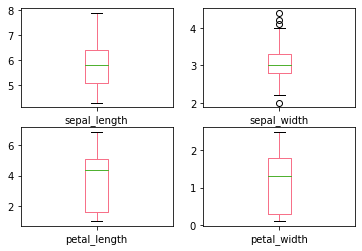

In [187]:
x.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

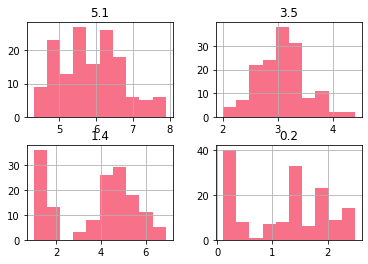

In [188]:
data.hist()
plt.show()

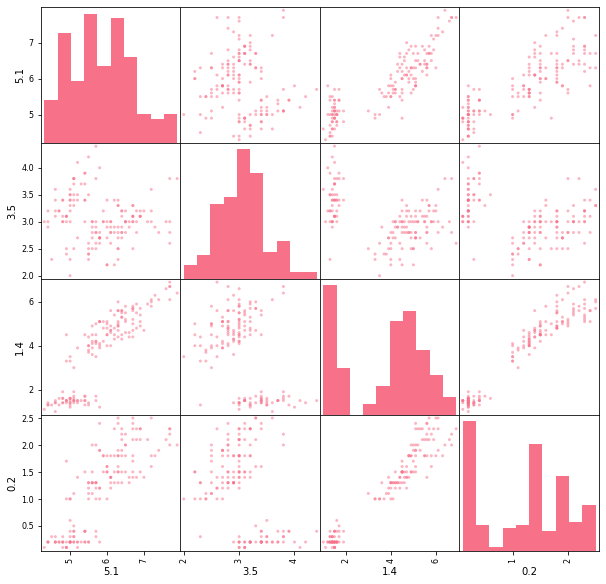

In [189]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,10))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

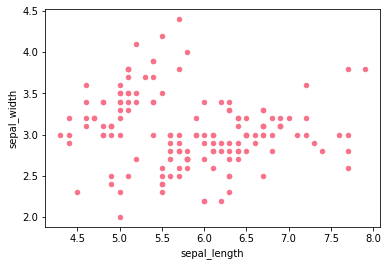

In [190]:
df.plot(kind="scatter", x="sepal_length", y= "sepal_width")

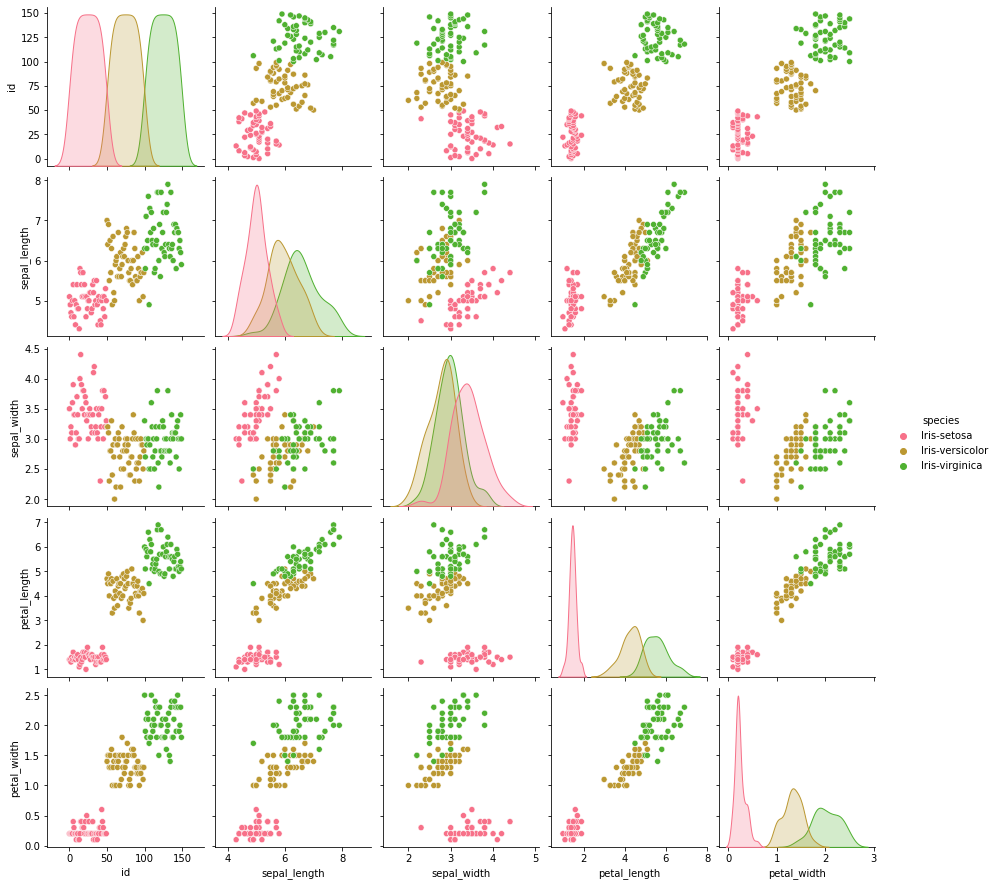

In [191]:
sns.pairplot(df,hue='species');

In [192]:
from sklearn import model_selection
array = data.values
X = array[:,0:4]
Y = array[:,4]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [193]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print("accuracy score = ",accuracy_score(y_test, predictions))

accuracy score =  0.9333333333333333
